In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB   
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score

In [15]:
dataset = pd.read_csv("spambase.csv") # Cargamos los datos desde un archivo CSV
dataset.head(10)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,spam
0,0,640,640,0,320,0,0,0,0,0,...,0,0,0,0,0,0,778,0,0,1
1,210,280,500,0,140,280,210,70,0,940,...,0,0,0,0,132,0,372,180,48,1
2,60,0,710,0,1230,190,190,120,640,250,...,60,0,0,10,143,0,276,184,10,1
3,0,0,0,0,630,0,310,630,310,630,...,0,0,0,0,137,0,137,0,0,1
4,0,0,0,0,630,0,310,630,310,630,...,0,0,0,0,135,0,135,0,0,1
5,0,0,0,0,1850,0,0,1850,0,0,...,0,0,0,0,223,0,0,0,0,1
6,0,0,0,0,1920,0,0,0,0,640,...,0,0,0,0,54,0,164,54,0,1
7,0,0,0,0,1880,0,0,1880,0,0,...,0,0,0,0,206,0,0,0,0,1
8,150,0,460,0,610,0,300,0,920,760,...,0,0,0,0,271,0,181,203,22,1
9,60,120,770,0,190,320,380,0,60,0,...,0,0,0,40,30,0,244,81,0,1


In [16]:
column_sum = dataset.groupby(by="spam", as_index=False).sum()

In [17]:
X = dataset.drop(columns="spam")
y = dataset["spam"]

<h3>Tareas y preguntas a resolver:</h3>
1. ¿Cuáles son las 10 palabras o símbolos más frecuentes en correos SPAM y en correos NO SPAM?<br>
<div style='margin-left:20px'>1.1 ¿Hay palabras o símbolos en común?<br>1.2 ¿Alguna resulta llamativa?<br></div>
2. Separe el conjunto de datos en un conjunto de entrenamiento (70%) y uno de prueba (30%).<br>
3. Utilizando un clasificador de Bayes ingenuo, entrene el modelo con el conjunto de entrenamiento.<br>
4. Utilizando un clasificador de Regresión Logística, entrene el modelo con el conjunto de entrenamiento (en este caso, normalice los datos).<br>
5. Calcule la matriz de confusión en el conjunto de prueba para ambos modelos.<br>
<div style='margin-left:20px'>5.1 ¿Qué tipo de error comete más cada modelo?<br>5.2 ¿Cuál de los dos tipos de error considera más importante en este problema?<br></div>
6. Calcule las métricas de precisión (precision) y recuperación (recall) para ambos modelos.<br>
<div style='margin-left:20px'>6.1 ¿Cuál es el mejor modelo según cada métrica?<br>6.2 ¿Cómo se relacionan estas métricas con los errores analizados en el punto anterior? Fundamente su respuesta.<br></div>
7. Obtenga la curva ROC y el AUC (Área Bajo la Curva ROC) de ambos modelos.<br>

1. ¿Cuáles son las 10 palabras o símbolos más frecuentes en correos SPAM y en correos NO SPAM?<br>
1.1 ¿Hay palabras o símbolos en común?<br>
Dentro de las palabras en común está You, Will y Your.<br>
<br>
1.2 ¿Alguna resulta llamativa?<br>
Dentro de las no spam, resulta llamativo el uso de George. Dentro de las spam era esperable free, business y !.

In [18]:
column_sum[column_sum["spam"]==1].melt(id_vars="spam", var_name="palabra", value_name="frecuencia").sort_values(by="frecuencia", ascending=False).head(10)

,spam,palabra,frecuencia
18,1,word_freq_you,4105599
20,1,word_freq_your,2502597
11,1,word_freq_will,997100
15,1,word_freq_free,939790
4,1,word_freq_our,931799
51,1,char_freq_!,931352
2,1,word_freq_all,732080
9,1,word_freq_mail,635470
17,1,word_freq_email,578759
16,1,word_freq_business,521250


In [19]:
column_sum[column_sum["spam"]==0].melt(id_vars="spam", var_name="palabra", value_name="frecuencia").sort_values(by="frecuencia", ascending=False).head(10)

,spam,palabra,frecuencia
18,0,word_freq_you,3541702
26,0,word_freq_george,3527559
24,0,word_freq_hp,2496576
11,0,word_freq_will,1495268
20,0,word_freq_your,1223098
25,0,word_freq_hpl,1204398
44,0,word_freq_re,1159138
45,0,word_freq_edu,800669
1,0,word_freq_address,681569
41,0,word_freq_meeting,604460


2. Separe el conjunto de datos en un conjunto de entrenamiento (70%) y uno de prueba (30%).<br>

In [20]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.3, random_state=30)

3. Utilizando un clasificador de Bayes ingenuo, entrene el modelo con el conjunto de entrenamiento.<br>

In [21]:
modeloMultinomial = MultinomialNB()
modeloMultinomial.fit(X_train, y_train)


,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [22]:
y_pred_multinomial = modeloMultinomial.predict(X_test)

4. Utilizando un clasificador de Regresión Logística, entrene el modelo con el conjunto de entrenamiento (en este caso, normalice los datos).<br>

In [23]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convertimos los arrays escalados a DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

In [24]:
modeloRegresion = LogisticRegression(max_iter=1000)
modeloRegresion.fit(X_train_scaled, y_train)   

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [25]:
y_pred_regresion=modeloRegresion.predict(X_test_scaled)

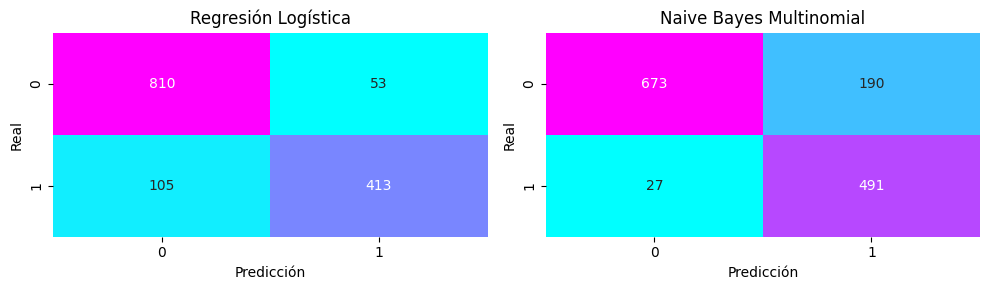

In [26]:
cm_regresion = confusion_matrix(y_test, y_pred_regresion)
cm_multinomial = confusion_matrix(y_test, y_pred_multinomial)

cms = [cm_regresion, cm_multinomial]
titles = ['Regresión Logística', 'Naive Bayes Multinomial']
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for ax, cm, title in zip(axes, cms, titles):
    sns.heatmap(cm, annot=True, fmt="d", cmap="cool", cbar=False, ax=ax)
    ax.set_title(title)
    ax.set_xlabel("Predicción")
    ax.set_ylabel("Real")

plt.tight_layout()
plt.show()


6. Calcule las métricas de precisión (precision) y recuperación (recall) para ambos modelos.<br>
<div style='margin-left:20px'>6.1 ¿Cuál es el mejor modelo según cada métrica?<br>6.2 ¿Cómo se relacionan estas métricas con los errores analizados en el punto anterior? Fundamente su respuesta.<br></div>

In [27]:
recall_bayes = recall_score(y_test, y_pred_multinomial)
precision_bayes = precision_score(y_test, y_pred_multinomial)
recall_logistica = recall_score(y_test,y_pred_regresion)
precision_logistica = precision_score(y_test, y_pred_regresion)

print(f"Prescision Bayes: {precision_bayes}")
print(f"Recall Bayes: {recall_bayes}\n")


print(f"Prescision Regresión Logística: {precision_logistica}")
print(f"Recall Regresión Logística: {recall_logistica}")

Prescision Bayes: 0.7209985315712188
Recall Bayes: 0.9478764478764479

Prescision Regresión Logística: 0.8862660944206009
Recall Regresión Logística: 0.7972972972972973


7. Obtenga la curva ROC y el AUC (Área Bajo la Curva ROC) de ambos modelos.<br>

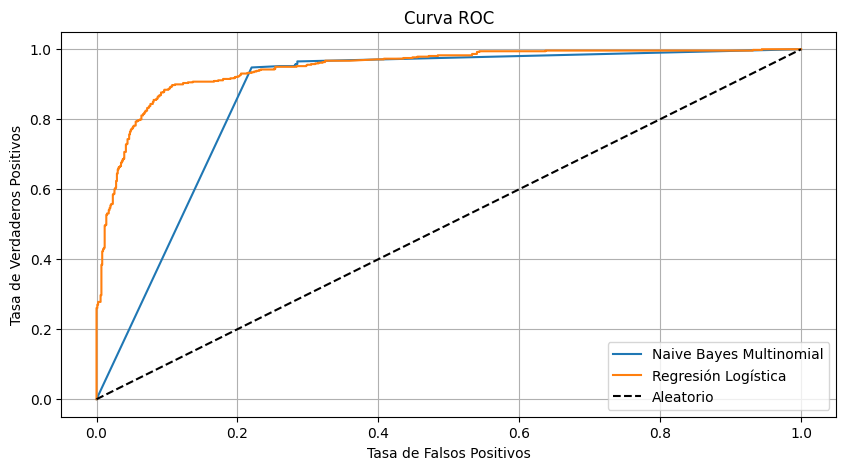

In [28]:
prob_bayes=modeloMultinomial.predict_proba(X_test)[:, 1]
prob_regresion=modeloRegresion.predict_proba(X_test_scaled)[:, 1]

auc_bayes = roc_auc_score(y_test, prob_bayes)
auc_regresion = roc_auc_score(y_test, prob_regresion)

fpr_bayes, tpr_bayes, thr_bayes = roc_curve(y_test, prob_bayes)
fpr_regresion, tpr_regresion, thr_regresion = roc_curve(y_test, prob_regresion)

plt.figure(figsize=(10, 5))
plt.plot(fpr_bayes, tpr_bayes, label='Naive Bayes Multinomial')
plt.plot(fpr_regresion, tpr_regresion, label='Regresión Logística')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.grid()
plt.show()

In [29]:
print(f"AUC Bayes: {auc_bayes}")
print(f"AUC Regresión Logística: {auc_regresion}")

AUC Bayes: 0.8685088829932398
AUC Regresión Logística: 0.9468396139890927
